**Introduction to Artificial Neural Networks with Keras**


In this notebook we will be playing with different datasets while solving some Artificial Neural Networks exercises

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0-preview.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

In [2]:
import tensorflow as tf
from tensorflow import keras

Let's start by loading the fashion MNIST dataset. KThe dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [4]:
X_train_full.shape

(60000, 28, 28)

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map, this will show you an example of a picture in the dataset.

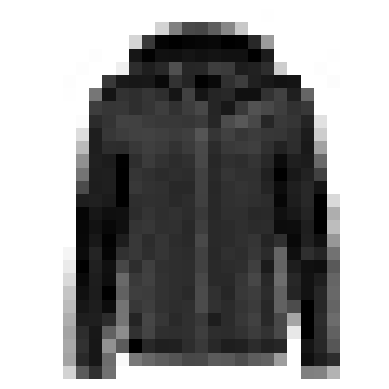

In [6]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [7]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [9]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [10]:
X_valid.shape

(5000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

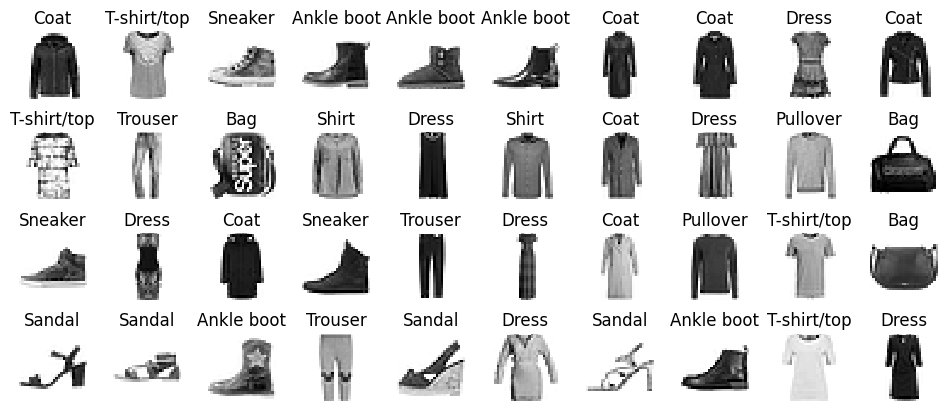

In [12]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

## Creating the model using the Sequential API



In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

C:\Users\AJ\antonio_janeiro_venv\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape               ┃        Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                  │ (None, 784)                │              0 │
├────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense (Dense)                      │ (None, 300)                │        235,500 │
├────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense_1 (Dense)                    │ (None, 100)                │         30,100 │
├────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense_2 (Dense)                    │ (None, 10)                 │          1,010 │
└────────────────────────────────────┴────────────────────────────┴────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

You can easily get a model’s list of layers, to fetch a layer by its index, or you can fetch
it by name:

In [16]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [17]:
model.get_layer(hidden1.name) is hidden1

True

All the parameters of a layer can be accessed using its get_weights() and
set_weights() methods. For a Dense layer, this includes both the connection weights
and the bias terms:

In [18]:
weights, biases = hidden1.get_weights()

In [19]:
weights

array([[ 1.5533552e-02,  6.8373710e-02,  6.3908711e-02, ...,
         5.5390924e-02,  5.7019725e-02, -3.0003633e-02],
       [ 6.6812575e-02,  7.1588531e-03, -1.9552384e-02, ...,
        -6.4577073e-02,  3.2457933e-03,  5.8625311e-02],
       [ 3.1020634e-02,  6.7830086e-05, -5.0566420e-02, ...,
        -4.4848025e-04, -3.6976080e-02,  7.3886931e-02],
       ...,
       [ 4.1126810e-02, -2.2284120e-02, -5.0500877e-02, ...,
         5.2020922e-02,  3.0461341e-02,  4.7306865e-03],
       [ 4.9760267e-02, -6.6767961e-02,  2.1928757e-02, ...,
        -7.3626570e-02, -6.8629369e-02,  3.3491850e-02],
       [ 6.8961412e-02,  3.8698144e-02,  3.5209231e-02, ...,
         5.1951811e-02, -1.8045995e-02,  7.4839741e-03]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

## Compiling the model

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

First, we use the "sparse_categorical_cross
entropy" loss because we have sparse labels (i.e., for each instance, there is just a target
class index, from 0 to 9 in this case), and the classes are exclusive. If instead we
had one target probability per class for each instance (such as one-hot vectors, e.g.
[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would
need to use the "categorical_crossentropy" loss instead. If we were doing binary
classification (with one or more binary labels), then we would use the "sigmoid" (i.e.,
logistic) activation function in the output layer instead of the "softmax" activation
function, and we would use the "binary_crossentropy" loss.

Regarding the optimizer, "sgd" means that we will train the model using simple Stochastic
Gradient Descent. In other words, Keras will perform the backpropagation
algorithm described earlier (i.e., reverse-mode autodiff plus Gradient Descent).

Finally, since this is a classifier, it’s useful to measure its "accuracy" during training
and evaluation.

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

## Training and evaluating the model

In [24]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6807 - loss: 1.0012 - val_accuracy: 0.8156 - val_loss: 0.5249
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8252 - loss: 0.5046 - val_accuracy: 0.8480 - val_loss: 0.4483
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8378 - loss: 0.4593 - val_accuracy: 0.8396 - val_loss: 0.4517
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8517 - loss: 0.4238 - val_accuracy: 0.8654 - val_loss: 0.3990
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8587 - loss: 0.4016 - val_accuracy: 0.8658 - val_loss: 0.3834
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8647 - loss: 0.3888 - val_accuracy: 0.8708 - val_loss: 0.3665
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8692 - loss: 0.3690 - val_accuracy: 0.8728 - val_loss: 0.3626
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8740 - loss: 0.3556 - 

In [25]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [26]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [27]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

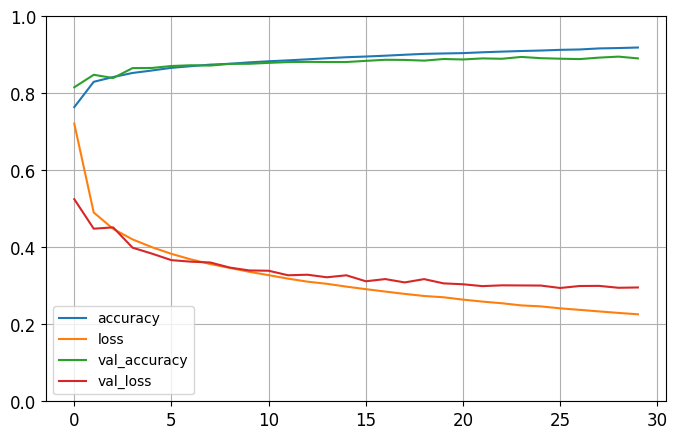

In [28]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

You can see that both the training accuracy and the validation accuracy steadily
increase during training, while the training loss and the validation loss decrease.
Good! Moreover, the validation curves are close to the training curves, which means
that there is not too much overfitting. In this particular case, the model looks like it
performed better on the validation set than on the training set at the beginning of
training. But that’s not the case: indeed, the validation error is computed at the end of
each epoch, while the training error is computed using a running mean during each
epoch. So the training curve should be shifted by half an epoch to the left. If you do
that, you will see that the training and validation curves overlap almost perfectly at
the beginning of training.

The training set performance ends up beating the validation performance, as is generally
the case when you train for long enough. You can tell that the model has not
quite converged yet, as the validation loss is still going down, so you should probably
continue training. It’s as simple as calling the fit() method again, since Keras just
continues training where it left off (you should be able to reach close to 89% validation
accuracy).

In [29]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8804 - loss: 0.3451


[0.3371138572692871, 0.8812000155448914]

## Using the model to make predictions

In [30]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

As you can see, for each instance the model estimates one probability per class, from
class 0 to class 9. For example, for the first image it estimates that the probability of
class 9 (ankle boot) is 96%, the probability of class 5 (sandal) is 3%, the probability of
class 7 (sneaker) is 1%, and the probabilities of the other classes are negligible. In
other words, it “believes” the first image is footwear, most likely ankle boots but possibly
sandals or sneakers. If you only care about the class with the highest estimated
probability (even if that probability is quite low), then you can use the pre
dict_classes() method instead:

In [31]:
y_prob = model.predict(X_new)


y_pred = np.argmax(y_prob, axis=1)

y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([9, 2, 1], dtype=int64)

In [32]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [33]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Here, the classifier actually classified all three images correctly

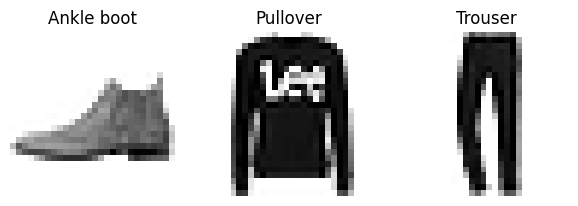

In [34]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

# Building a Regression MLP Using the Sequential API

In [35]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Let's load, split and scale the California housing dataset

In [36]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [37]:
np.random.seed(42)
tf.random.set_seed(42)

Using the Sequential API to build, train, evaluate, and use a regression MLP to make
predictions is quite similar to what we did for classification. The main differences are
the fact that the output layer has a single neuron (since we only want to predict a single
value) and uses no activation function, and the loss function is the mean squared
error. Since the dataset is quite noisy, we just use a single hidden layer with fewer
neurons than before, to avoid overfitting:

In [38]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


C:\Users\AJ\antonio_janeiro_venv\venv\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8734 - val_loss: 2.3189
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8996 - val_loss: 0.9368
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7430 - val_loss: 0.6669
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6912 - val_loss: 0.6013
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6562 - val_loss: 0.5735
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6283 - val_loss: 0.5533
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6047 - val_loss: 0.5348
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5844 - val_loss: 0.5172
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5667 - val_loss: 0.5006
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5509 - val_loss: 0.4855
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5368 - val_loss: 0.4723
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

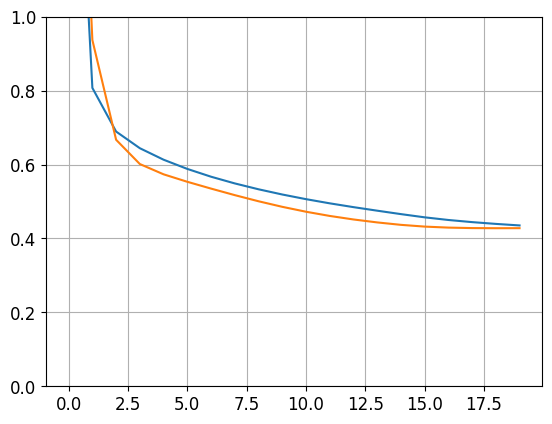

In [39]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [40]:
y_pred

array([[0.54971945],
       [1.6079679 ],
       [3.2558115 ]], dtype=float32)

## Saving and Restoring a Model

In [41]:
np.random.seed(42)
tf.random.set_seed(42)

In [42]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [43]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2862 - val_loss: 1.8977
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7621 - val_loss: 0.8658
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6260 - val_loss: 0.6028
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5714 - val_loss: 0.5176
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5363 - val_loss: 0.4781
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5110 - val_loss: 0.4562
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4919 - val_loss: 0.4421
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4768 - val_loss: 0.4327
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4645 - val_loss: 0.4269
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4541 - val_loss: 0.4240
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 0.4283


Keras will use the HDF5 format to save both the model’s architecture (including every
layer’s hyperparameters) and the values of all the model parameters for every layer
(e.g., connection weights and biases). It also saves the optimizer (including its hyperparameters
and any state it may have).

In [44]:
model.save("my_keras_model.keras")

You will typically have a script that trains a model and saves it, and one or more
scripts (or web services) that load the model and use it to make predictions. Loading
the model is just as easy:

In [45]:
model = keras.models.load_model("my_keras_model.keras")

In [46]:
model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[0.7273242],
       [1.5652928],
       [3.3325617]], dtype=float32)

In [47]:
model.save_weights("my_keras_weights.weights.h5")

In [48]:
model.load_weights("my_keras_weights.weights.h5")